In [1]:
!pip install statsmodels

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from IPython.display import Markdown, display
from openbb import obb
from statsmodels import regression

In [3]:
obb.user.preferences.output_type = "dataframe"

In [5]:
symbols = [
    "NEM",
    "RGLD",
    "SSRM",
    "CDE",
    "LLY",
    "UNH",
    "JNJ",
    "MRK",
    "SPY",
]

In [7]:
data = obb.equity.price.historical(
    symbols,
    start_date="2020-01-01",
    end_date="2022-12-31",
    provider="cboe",
).pivot(columns="symbol", values="close")

In [8]:
benchmark_returns = data.pop("SPY").pct_change().dropna()

In [9]:
portfolio_returns = data.pct_change().dropna().sum(axis=1)
portfolio_returns.name = "portfolio"

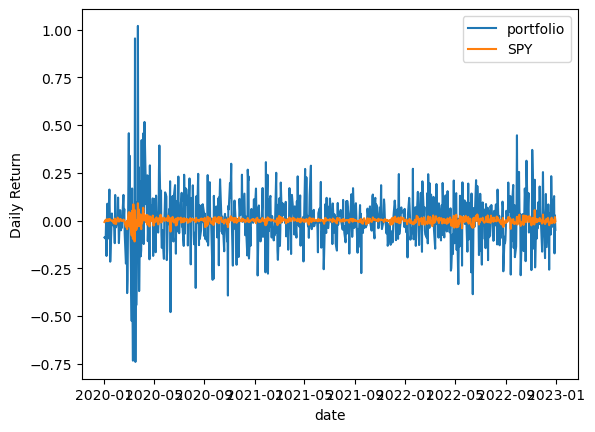

In [10]:
portfolio_returns.plot()
benchmark_returns.plot()
plt.ylabel("Daily Return")
plt.legend()
plt.show()

In [11]:
def linreg(x, y):
    # Add a column of 1s to fit alpha

    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y, x).fit()
    # Remove the constant now that we're done

    x = x[:, 1]
    return model.params[0], model.params[1]

In [12]:
X = benchmark_returns.values
Y = portfolio_returns.values

In [13]:
alpha, beta = linreg(X, Y)


In [14]:
display(f"Alpha: {alpha}")
display(f"Beta: {beta}")

'Alpha: 0.0025762381391960533'

'Beta: 5.5523814494660195'

In [15]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha

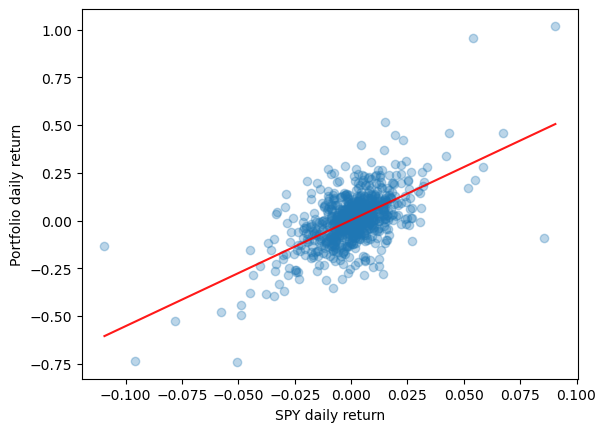

In [19]:
plt.scatter(X, Y, alpha=0.3)
plt.xlabel("SPY daily return")
plt.ylabel("Portfolio daily return")
plt.plot(X2, Y_hat, "r", alpha=0.9)
plt.show()

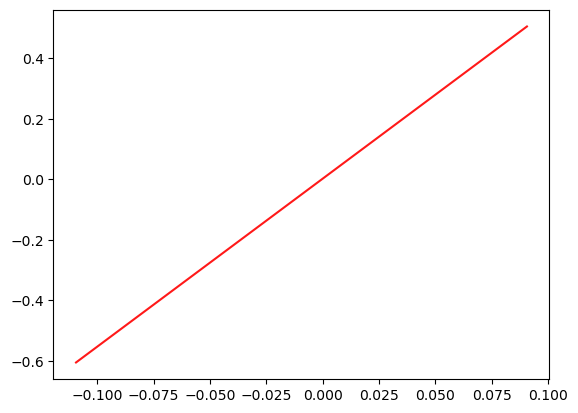

In [17]:
plt.plot(X2, Y_hat, "r", alpha=0.9)
plt.show()

In [18]:
hedged_portfolio_returns = -1 * beta * benchmark_returns + portfolio_returns

In [20]:
P = hedged_portfolio_returns.values
alpha, beta = linreg(X, P)

In [21]:
display(f"Alpha: {alpha}")
display(f"Beta: {beta}")

'Alpha: 0.0025762381391960494'

'Beta: 6.416769631125954e-15'